In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # nicer (easier) visualisation
%matplotlib inline


# for saving
import os,os.path

### Setting  up directory and filenames

In [2]:
data_Dir = "data/"
fn_patient_info     = data_Dir + 'clinical_data_demo.csv'
fn_fpkm             = data_Dir + 'log2FPKM_rawdata_demo.csv'

### Load Clinical Data

Load the clinical data.
Examine different columns.
Which ones are demographic and clinical information column ?
Which ones are the clinical endpoint columns ?

In [3]:
df_patient_info = pd.read_csv(fn_patient_info)
df_patient_info = df_patient_info.set_index('ID')

df_patient_info.describe(include='all')

df_patient_info

,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease
ID,,,,,,
NB001,M,987.0,ST4,4,HR,1
NB002,M,1808.0,ST4,4,HR,1
NB007,M,942.0,ST4,4,HR,0
NB012,M,380.0,ST1,1,LR,0
NB013,M,3394.0,ST4,4,HR,1
...,...,...,...,...,...,...
NB494,M,56.0,ST1,1,LR,0
NB495,M,163.0,ST1,1,LR,0
NB496,M,132.0,ST1,1,LR,0


### Load the RNAs-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [4]:
df_fpkm = pd.read_csv(fn_fpkm)

#df_fpkm

In [5]:
## Rename some columns for clarity

df_fpkm = df_fpkm.rename({'00gene_id':'gene_id'},axis=1)
df_fpkm.set_index(['gene_id'])



,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,NaN,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,NaN,0.491331,0.868249,NaN,0.660139,1.152988
A1BG,1.910053,NaN,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,NaN,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,NaN,NaN,1.208723,NaN,1.529221,1.102866
A1CF,NaN,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,NaN,0.021880,0.000000,...,0.024298,0.007295,NaN,0.006678,0.005746,NaN,NaN,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,NaN,NaN,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.862512,0.051655,0.022912,0.108028,0.049621,0.264942,0.044684,0.000000,0.012183,0.021898,...,0.026980,NaN,0.780477,NaN,NaN,0.011083,0.000000,0.070668,0.022501,0.031067
ZYG11B,3.561729,3.595790,2.236695,3.312516,2.235632,3.459969,3.130989,2.359791,NaN,3.284610,...,2.827654,2.569946,NaN,2.773570,3.690249,3.274257,3.380637,3.420162,3.462327,3.440527
NaN,5.039327,5.144157,4.982975,6.142091,NaN,6.108395,5.645258,5.018567,5.393207,5.730512,...,5.103993,4.754433,4.938587,4.572914,4.877509,5.591545,5.207842,5.346003,5.427338,5.148169


In [6]:
## Set "ID" as column indetified for the index column 
df_fpkm.columns.name = 'ID'
df_fpkm

ID,gene_id,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
0,1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,NaN,0.981855,...,0.997977,1.003559,0.842437,1.057873,NaN,0.491331,0.868249,NaN,0.660139,1.152988
1,A1BG,1.910053,NaN,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,...,2.336929,2.836360,NaN,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
2,A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,...,1.182908,1.367371,0.643751,1.096815,NaN,NaN,1.208723,NaN,1.529221,1.102866
3,A1CF,NaN,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,NaN,0.021880,...,0.024298,0.007295,NaN,0.006678,0.005746,NaN,NaN,0.000000,0.022780,0.018720
4,A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,NaN,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,ZYG11A,0.862512,0.051655,0.022912,0.108028,0.049621,0.264942,0.044684,0.000000,0.012183,...,0.026980,NaN,0.780477,NaN,NaN,0.011083,0.000000,0.070668,0.022501,0.031067
23142,ZYG11B,3.561729,3.595790,2.236695,3.312516,2.235632,3.459969,3.130989,2.359791,NaN,...,2.827654,2.569946,NaN,2.773570,3.690249,3.274257,3.380637,3.420162,3.462327,3.440527
23143,NaN,5.039327,5.144157,4.982975,6.142091,NaN,6.108395,5.645258,5.018567,5.393207,...,5.103993,4.754433,4.938587,4.572914,4.877509,5.591545,5.207842,5.346003,5.427338,5.148169
23144,ZZEF1,3.245179,2.843600,NaN,2.864198,2.761698,NaN,2.755304,2.817902,2.730553,...,3.519328,2.834434,2.949716,3.051346,2.951646,2.942612,3.231953,3.213022,NaN,2.738632


### Examine the clinical data

DeathFromDisease    0   1
Gender                   
F                  79  15
M                 112  27


<AxesSubplot:>

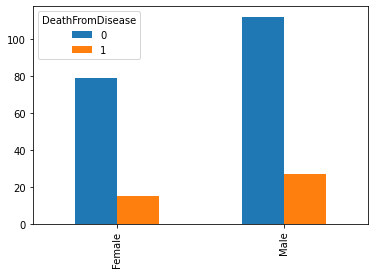

In [7]:
## Gender Vs Death From Disease ##
gender_vs_dfd = pd.DataFrame(pd.crosstab( df_patient_info["Gender"], df_patient_info["DeathFromDisease"] ))
print(gender_vs_dfd)
gender_vs_dfd.index = ["Female", "Male"]
gender_vs_dfd.plot.bar()

INSS Stage   1   4
Gender            
F           57  37
M           60  79


<AxesSubplot:>

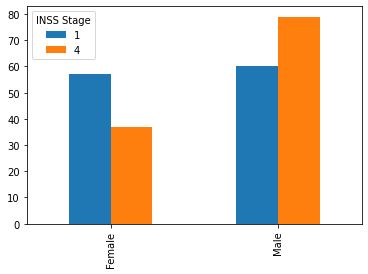

In [8]:
## Gender Vs Death From INS Stage ##
gender_vs_ins = pd.DataFrame(pd.crosstab( df_patient_info["Gender"], df_patient_info["INSS Stage"] ))
print(gender_vs_ins)
gender_vs_ins.index = ["Female", "Male"]
gender_vs_ins.plot.bar()

#### Now Let's do the same for the Clinico Genetic Group 

- How many unique fields are there ? Anwser : We know from above it's 2.
- What does it mean ? Anwser : Pleas look at the reference paper. 


In [9]:
df_patient_info["clinico genetic subgroup"].unique()

array(['ST4', 'ST1'], dtype=object)

In [10]:
def cross_comparison(factor1 = None, factor2 = None ):
    factor1_vs_factor2 = pd.DataFrame(pd.crosstab( df_patient_info[factor1], df_patient_info[factor2] ))
    print(factor1_vs_factor2)
    factor1_vs_factor2.index = df_patient_info[factor1].unique()
    factor1_vs_factor2.plot.bar()

HighRisk    HR   LR
INSS Stage         
1            0  117
4           83   33


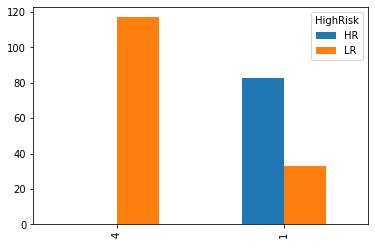

In [11]:
cross_comparison(factor1 = "INSS Stage", factor2 = "HighRisk" )

In [16]:
## Boxplot
df_patient_info [ ["Gender", "Age"] ]

df_patient_info [ ["HighRisk", "Age"] ]

df_patient_info [ ["DeathFromDisease", "Age"] ]

,DeathFromDisease,Age
ID,,
NB001,1,987.0
NB002,1,1808.0
NB007,0,942.0
NB012,0,380.0
NB013,1,3394.0
...,...,...
NB494,0,56.0
NB495,0,163.0
NB496,0,132.0


<AxesSubplot:xlabel='DeathFromDisease', ylabel='Age'>

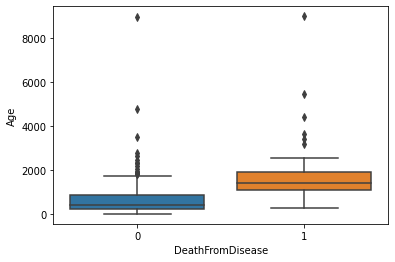

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot( x = "DeathFromDisease", y = "Age", data = df_patient_info )



<AxesSubplot:>

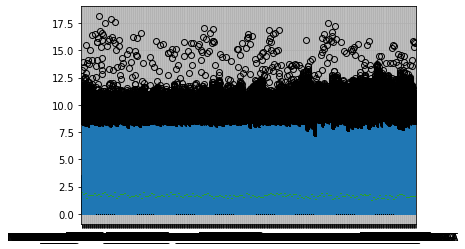

In [103]:
#df_fpkm.boxplot()

#### Now Let's find the common samples between the clinical data and RNA Seq Data


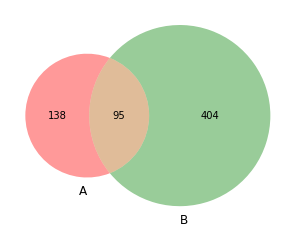

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

clinical_ids = set(df_patient_info.index)
sample_ids = set(df_fpkm.columns)

missing_samples =  clinical_ids.intersection(sample_ids)

# Use the venn2 function
venn2([set(clinical_ids), set(sample_ids)])
plt.show()

In [15]:
missing_in_clinical = list(set(df_patient_info.index.to_list()) - set(df_fpkm.columns.to_list()))

print(df_patient_info.index.to_list())
#missing_in_clinical


missing_in_RNA = list( set(df_fpkm.columns.to_list()) - set(df_patient_info.index.to_list()))

#print(missing_in_RNA)


fpkm_sample_names = df_fpkm.columns.to_list()
#print(df_patient_info.index.to_list()[20])
print(fpkm_sample_names)

# missing_in_RNA_now = list( set(fpkm_sample_names_updated) - set(df_patient_info.index.to_list()))
# print(missing_in_RNA_now)


['NB001', 'NB002', 'NB007', 'NB012', 'NB013', 'NB015', 'NB019', 'NB020', 'NB021', 'NB022', 'NB023', 'NB024', 'NB025', 'NB026', 'NB027', 'NB028', 'NB029', 'NB030', 'NB031', 'NB032', 'NB033', 'NB034', 'NB035', 'NB036', 'NB037', 'NB038', 'NB050', 'NB052', 'NB053', 'NB054', 'NB055', 'NB056', 'NB057', 'NB058', 'NB059', 'NB060', 'NB082', 'NB083', 'NB084', 'NB085', 'NB086', 'NB087', 'NB088', 'NB089', 'NB090', 'NB091', 'NB092', 'NB093', 'NB094', 'NB095', 'NB096', 'NB097', 'NB098', 'NB099', 'NB100', 'NB101', 'NB102', 'NB103', 'NB104', 'NB105', 'NB106', 'NB107', 'NB108', 'NB109', 'NB110', 'NB111', 'NB114', 'NB133', 'NB139', 'NB140', 'NB143', 'NB144', 'NB152', 'NB153', 'NB154', 'NB155', 'NB156', 'NB157', 'NB158', 'NB159', 'NB160', 'NB161', 'NB162', 'NB163', 'NB164', 'NB165', 'NB166', 'NB167', 'NB168', 'NB172', 'NB199', 'NB200', 'NB201', 'NB202', 'NB203', 'NB204', 'NB205', 'NB206', 'NB207', 'NB208', 'NB209', 'NB210', 'NB211', 'NB213', 'NB214', 'NB215', 'NB216', 'NB224', 'NB235', 'NB237', 'NB238', 

#### Write a code segment to remove the additional string from the FPKM File name ##

In [20]:
## Function to split a string based on separator and return the first value
def correct_sample_names(sample_name=None, separator = "_"):
    sample_name_0 = sample_name.split(separator,1)[0]
    return sample_name_0

print("Before Update")
print(fpkm_sample_names)

fpkm_sample_names_updated = [correct_sample_names(sub) for sub in fpkm_sample_names]

print("After Update")
print(fpkm_sample_names_updated)



Before Update
['gene_id', 'NB001', 'NB002', 'NB003', 'NB004', 'NB005', 'NB006', 'NB007', 'NB008', 'NB009', 'NB010', 'NB011', 'NB012', 'NB013_BC02FPACXX_L1_CGATGT', 'NB014_BC02FPACXX_L1_TGACCA', 'NB015_BC02FPACXX_L1_ACAGTG', 'NB016_BC02FPACXX_L1_GCCAAT', 'NB017_BC02FPACXX_L1_CAGATC', 'NB018_BC02FPACXX_L1_CTTGTA', 'NB019_BC02FPACXX_L2_CGATGT', 'NB020_BC02FPACXX_L2_TGACCA', 'NB021_BC02FPACXX_L2_ACAGTG', 'NB022_BC02FPACXX_L2_GCCAAT', 'NB023_BC02FPACXX_L2_CAGATC', 'NB024_BC02FPACXX_L2_CTTGTA', 'NB025_BC02FPACXX_L3_CGATGT', 'NB026_BC02FPACXX_L3_TGACCA', 'NB027_BC02FPACXX_L3_ACAGTG', 'NB028_BC02FPACXX_L3_GCCAAT', 'NB029_BC02FPACXX_L3_CAGATC', 'NB030_BC02FPACXX_L3_CTTGTA', 'NB031_BC02FPACXX_L4_CGATGT', 'NB032_BC02FPACXX_L4_TGACCA', 'NB033_BC02FPACXX_L4_ACAGTG', 'NB034_BC02FPACXX_L4_GCCAAT', 'NB035_BC02FPACXX_L4_CAGATC', 'NB036_BC02FPACXX_L4_CTTGTA', 'NB037_BC02FPACXX_L5_CGATGT', 'NB038_BC02FPACXX_L5_TGACCA', 'NB039_BC02FPACXX_L5_ACAGTG', 'NB040_BC02FPACXX_L5_GCCAAT', 'NB041_BC02FPACXX_L5_CAGAT

In [21]:
## Assign the updated samples names back to the RNA Seq Data frame
df_fpkm.columns = fpkm_sample_names_updated


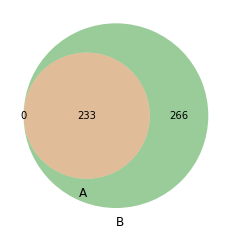

233


In [22]:
# Use the venn2 function
venn2([set(clinical_ids), set(fpkm_sample_names_updated)])
plt.show()

print(len(clinical_ids))

In [25]:
## Now Subset the common samples ##

common_samples = list(clinical_ids.intersection( set(df_fpkm.columns) ) )
print(len(common_samples))


## Subset common clinical samples #
df_patient_info["ID"] = df_patient_info.index
df_common_patient_info = df_patient_info[ df_patient_info["ID"].isin(common_samples) ]
#print(df_common_patient_info.shape)

df_common_patient_info.to_csv("df_common_patient_info.csv", sep = ",")

## Subset FPKM Sample #

df_common_fpkm = df_fpkm[ ["gene"] + common_samples ]
#print(df_common_fpkm.shape)
df_common_patient_info



233


,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID
ID,,,,,,,
NB001,M,987.0,ST4,4,HR,1,NB001
NB002,M,1808.0,ST4,4,HR,1,NB002
NB007,M,942.0,ST4,4,HR,0,NB007
NB012,M,380.0,ST1,1,LR,0,NB012
NB013,M,3394.0,ST4,4,HR,1,NB013
...,...,...,...,...,...,...,...
NB494,M,56.0,ST1,1,LR,0,NB494
NB495,M,163.0,ST1,1,LR,0,NB495
NB496,M,132.0,ST1,1,LR,0,NB496


### Let's Visualize the data

In [26]:

#df_common_patient_info = df_common_patient_info.drop("ID", axis = 1)
df_common_patient_info.to_csv("data/df_common_patient_info.csv")


In [27]:
df_common_fpkm.to_csv("data/FPKM_Common_Samples.csv")

## Data Pre-processing 
1. Join the two data frames
  
2. High Dimensional Data Visualization
    2.1 FPKM data

3. Imputation and Outlier    
    3.1 Data Imputation
    3.2 Outlier removal


In [28]:
## Transform and Merge the two data frames

# df_common_fpkm.index = df_common_fpkm["gene"]
# df_common_fpkm = df_common_fpkm.drop("gene",axis = 1)
df_common_fpkm_t = df_common_fpkm.transpose()
#df_common_fpkm_t.index.name = "ID"
df_common_fpkm_t.columns = df_common_fpkm["gene"]
df_common_fpkm_t.columns.values


array(['1/2-SBSRNA4', 'A1BG', 'A1BG-AS1', ..., nan, 'ZZEF1', 'ZZZ3'],
      dtype=object)

In [29]:
## Merge two data Frames
merged_df = pd.merge(df_common_patient_info, df_common_fpkm_t, left_index=True, right_index=True)
merged_df.to_csv("Merged_Clinical_and_FPKM_Data.csv")

# import pandas as pd
# merged_df = pd.read_csv("Merged_Clinical_and_FPKM_Data.csv") 
merged_df

,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,NaN,ZXDB,ZXDC,ZYG11A,ZYG11B,NaN,ZZEF1,ZZZ3
NB001,M,987.0,ST4,4,HR,1,NB001,0.834381,1.910053,1.453191,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
NB002,M,1808.0,ST4,4,HR,1,NB002,0.743094,NaN,0.640614,...,NaN,5.037365,1.487028,2.748315,3.201112,0.051655,3.59579,5.144157,2.8436,3.052771
NB007,M,942.0,ST4,4,HR,0,NB007,1.811352,1.617745,1.304178,...,3.475448,4.009473,NaN,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
NB012,M,380.0,ST1,1,LR,0,NB012,0.867069,1.701012,NaN,...,2.901427,3.363754,NaN,2.135374,3.221429,0.0,3.32059,4.820981,3.274564,3.420236
NB013,M,3394.0,ST4,4,HR,1,NB013,1.854,1.591306,NaN,...,1.889871,2.857943,1.509924,2.074457,3.4787,0.020564,3.193922,4.184836,2.360822,3.498098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB494,M,56.0,ST1,1,LR,0,NB494,0.491331,1.451425,NaN,...,3.540251,3.912382,1.056681,NaN,3.054253,0.011083,3.274257,5.591545,2.942612,3.217237
NB495,M,163.0,ST1,1,LR,0,NB495,0.868249,1.493852,1.208723,...,3.183471,3.754813,1.118021,1.835253,3.257655,0.0,3.380637,5.207842,3.231953,3.206993
NB496,M,132.0,ST1,1,LR,0,NB496,NaN,1.641241,NaN,...,3.287845,4.49938,0.951203,NaN,3.139298,0.070668,3.420162,5.346003,3.213022,2.972568
NB497,F,379.0,ST1,1,LR,0,NB497,0.660139,1.994978,1.529221,...,2.866374,3.412777,1.539571,2.346282,NaN,0.022501,3.462327,5.427338,NaN,NaN


In [29]:
#print(df_common_patient_info.loc['NB002'])
#print(df_common_fpkm_t.loc[['NB002']])
# merged_df
# merged_df["ID"] = merged_df.index


#### Melt the merged data frame for meaningful visualization. 

In [30]:
#print(df_common_patient_info.columns.to_list())
ids = df_common_patient_info.columns.to_list()
print(ids)

['Gender', 'Age', 'clinico genetic subgroup', 'INSS Stage', 'HighRisk', 'DeathFromDisease', 'ID']


In [31]:
merged_df

,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,NaN,ZXDB,ZXDC,ZYG11A,ZYG11B,NaN,ZZEF1,ZZZ3
NB001,M,987.0,ST4,4,HR,1,NB001,0.834381,1.910053,1.453191,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
NB002,M,1808.0,ST4,4,HR,1,NB002,0.743094,NaN,0.640614,...,NaN,5.037365,1.487028,2.748315,3.201112,0.051655,3.59579,5.144157,2.8436,3.052771
NB007,M,942.0,ST4,4,HR,0,NB007,1.811352,1.617745,1.304178,...,3.475448,4.009473,NaN,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
NB012,M,380.0,ST1,1,LR,0,NB012,0.867069,1.701012,NaN,...,2.901427,3.363754,NaN,2.135374,3.221429,0.0,3.32059,4.820981,3.274564,3.420236
NB013,M,3394.0,ST4,4,HR,1,NB013,1.854,1.591306,NaN,...,1.889871,2.857943,1.509924,2.074457,3.4787,0.020564,3.193922,4.184836,2.360822,3.498098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB494,M,56.0,ST1,1,LR,0,NB494,0.491331,1.451425,NaN,...,3.540251,3.912382,1.056681,NaN,3.054253,0.011083,3.274257,5.591545,2.942612,3.217237
NB495,M,163.0,ST1,1,LR,0,NB495,0.868249,1.493852,1.208723,...,3.183471,3.754813,1.118021,1.835253,3.257655,0.0,3.380637,5.207842,3.231953,3.206993
NB496,M,132.0,ST1,1,LR,0,NB496,NaN,1.641241,NaN,...,3.287845,4.49938,0.951203,NaN,3.139298,0.070668,3.420162,5.346003,3.213022,2.972568
NB497,F,379.0,ST1,1,LR,0,NB497,0.660139,1.994978,1.529221,...,2.866374,3.412777,1.539571,2.346282,NaN,0.022501,3.462327,5.427338,NaN,NaN


In [51]:
ids

['Gender',
 'Age',
 'clinico genetic subgroup',
 'INSS Stage',
 'HighRisk',
 'DeathFromDisease',
 'ID']

In [32]:
## Melt the data frame.

merged_df_m = merged_df.melt( id_vars= ids )
print(merged_df_m)


        Gender     Age clinico genetic subgroup  INSS Stage HighRisk  \
0            M   987.0                      ST4           4       HR   
1            M  1808.0                      ST4           4       HR   
2            M   942.0                      ST4           4       HR   
3            M   380.0                      ST1           1       LR   
4            M  3394.0                      ST4           4       HR   
...        ...     ...                      ...         ...      ...   
5393013      M    56.0                      ST1           1       LR   
5393014      M   163.0                      ST1           1       LR   
5393015      M   132.0                      ST1           1       LR   
5393016      F   379.0                      ST1           1       LR   
5393017      F   530.0                      ST1           1       LR   

         DeathFromDisease     ID     variable     value  
0                       1  NB001  1/2-SBSRNA4  0.834381  
1                  

## Data Visualization ##

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(50.7,4.27)})
sns.boxplot( x = "ID", y = "value", data = merged_df_m )
plt.xticks(rotation=90)
plt.savefig("Avg_Exp_FPKM_No_Colr.png")


In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(50.7,4.27)})
sns.boxplot( x = "ID", y = "value", hue = "HighRisk" , data = merged_df_m )
plt.xticks(rotation=90)
plt.savefig("Avg_Exp_FPKM_Col_by_HR.png")


In [ ]:
merged_df_m_HRord = merged_df_m.sort_values(by = "HighRisk")

sns.set(rc={'figure.figsize':(50.7,4.27)})
sns.boxplot( x = "ID", y = "value", hue = "HighRisk" , data = merged_df_m_HRord ).set(title='Average Expression Profile : FPKM Samples')
plt.xticks(rotation=90)
plt.savefig("Avg_Exp_Ord_by_HR.png")

#### Data Imputation : FPKM Data


In [33]:
df_common_fpkm.isna().sum() 

gene     2315
NB402    2315
NB106    2315
NB420    2315
NB371    2315
         ... 
NB055    2315
NB038    2315
NB208    2315
NB216    2315
NB058    2315
Length: 234, dtype: int64

In [53]:
merged_df

,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,NaN,ZXDB,ZXDC,ZYG11A,ZYG11B,NaN,ZZEF1,ZZZ3
ID,,,,,,,,,,,,,,,,,,,,,
NB001,M,987.0,ST4,4,HR,1,NB001,0.834381,1.910053,1.453191,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
NB002,M,1808.0,ST4,4,HR,1,NB002,0.743094,NaN,0.640614,...,NaN,5.037365,1.487028,2.748315,3.201112,0.051655,3.59579,5.144157,2.8436,3.052771
NB007,M,942.0,ST4,4,HR,0,NB007,1.811352,1.617745,1.304178,...,3.475448,4.009473,NaN,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
NB012,M,380.0,ST1,1,LR,0,NB012,0.867069,1.701012,NaN,...,2.901427,3.363754,NaN,2.135374,3.221429,0.0,3.32059,4.820981,3.274564,3.420236
NB013,M,3394.0,ST4,4,HR,1,NB013,1.854,1.591306,NaN,...,1.889871,2.857943,1.509924,2.074457,3.4787,0.020564,3.193922,4.184836,2.360822,3.498098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB494,M,56.0,ST1,1,LR,0,NB494,0.491331,1.451425,NaN,...,3.540251,3.912382,1.056681,NaN,3.054253,0.011083,3.274257,5.591545,2.942612,3.217237
NB495,M,163.0,ST1,1,LR,0,NB495,0.868249,1.493852,1.208723,...,3.183471,3.754813,1.118021,1.835253,3.257655,0.0,3.380637,5.207842,3.231953,3.206993
NB496,M,132.0,ST1,1,LR,0,NB496,NaN,1.641241,NaN,...,3.287845,4.49938,0.951203,NaN,3.139298,0.070668,3.420162,5.346003,3.213022,2.972568


In [11]:
# numeric_features = df_common_fpkm.index
# merged_numeric_df = merged_df[numeric_features]



Index(['1/2-SBSRNA4', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2LD1', 'A2M', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'Unnamed: 23145', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B',
       'Unnamed: 23150', 'ZZEF1', 'ZZZ3'],
      dtype='object', length=23146)

In [34]:
merged_df.shape[1]

23153

In [35]:
## Separate Numeric and Categorical Features 

numeric_features = merged_df.columns[7:merged_df.shape[1]].to_list()
numeric_features = [x for x in numeric_features if str(x) != 'nan']
len(numeric_features)
#numeric_features.append
merged_sub_df = merged_df[ numeric_features ]
merged_sub_df

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZZEF1,ZZZ3
NB001,0.834381,1.910053,1.453191,NaN,0.580151,NaN,0.027558,0.170671,1.53567,0.057101,...,2.025064,2.266454,3.651545,5.045111,2.395551,3.466692,0.862512,3.561729,3.245179,3.296496
NB002,0.743094,NaN,0.640614,0.005902,0.738233,NaN,0.0,0.0,1.038092,0.066125,...,2.885795,2.209135,NaN,5.037365,2.748315,3.201112,0.051655,3.59579,2.8436,3.052771
NB007,1.811352,1.617745,1.304178,0.0,1.018705,NaN,0.0,0.210127,1.959344,0.164813,...,2.271178,2.107688,3.475448,4.009473,2.198063,3.123347,0.044684,3.130989,2.755304,2.933508
NB012,0.867069,1.701012,NaN,0.0,0.430287,5.728672,0.0,0.087755,0.740207,0.028764,...,2.49143,2.502628,2.901427,3.363754,2.135374,3.221429,0.0,3.32059,3.274564,3.420236
NB013,1.854,1.591306,NaN,0.004659,0.476984,6.54477,0.0,0.080015,1.779873,0.102315,...,2.521782,NaN,1.889871,2.857943,2.074457,3.4787,0.020564,3.193922,2.360822,3.498098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB494,0.491331,1.451425,NaN,NaN,0.957837,6.877806,0.0,0.167947,1.590789,0.110055,...,2.643445,2.58008,3.540251,3.912382,NaN,3.054253,0.011083,3.274257,2.942612,3.217237
NB495,0.868249,1.493852,1.208723,NaN,0.812093,6.655558,0.0,0.124005,1.58503,0.157478,...,2.716793,2.750283,3.183471,3.754813,1.835253,3.257655,0.0,3.380637,3.231953,3.206993
NB496,NaN,1.641241,NaN,0.0,0.488748,5.869775,0.0,0.093549,0.808721,0.030696,...,2.515415,2.38303,3.287845,4.49938,NaN,3.139298,0.070668,3.420162,3.213022,2.972568
NB497,0.660139,1.994978,1.529221,0.02278,1.068072,6.581892,0.0,0.0,NaN,0.057179,...,NaN,2.373526,2.866374,3.412777,2.346282,NaN,0.022501,3.462327,NaN,NaN


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

## Numeical Features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
     transformers=[
         ('numerical_imputer', numeric_transformer, numeric_features)])


num_imputer = Pipeline(steps=[('preprocessor', preprocessor)])
merged_df_imputed = num_imputer.fit_transform(merged_sub_df)

merged_df_imputed_df = pd.DataFrame( merged_df_imputed, columns= numeric_features )
merged_df_imputed_df

merged_df_imputed_df.to_csv("Merged_Imputed_FPKM.csv", sep = ",")



#### Simple Data Pre-processing 

1. Normalize the data
2. Remove features with little or no variance

In [38]:
## Data Normalization

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


def normalize(df, scaler = StandardScaler()):
    df.columns = df.columns.map(str)
    numeric_features = list(df.select_dtypes(float).columns)
    numeric_transformer = Pipeline(steps=[ ('scaler', scaler)])
    preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features)])
    normalizer = Pipeline(steps=[('preprocessor', preprocessor)])
    df_norm = pd.DataFrame(normalizer.fit_transform(df[numeric_features]), columns = numeric_features, index=df.index)
    return df_norm


merged_norm_df = normalize(merged_df_imputed_df, scaler = StandardScaler())

merged_norm_df.to_csv("Merged_Impute_Norm_FPKM.csv", sep = ",")


In [ ]:
#import pandas as pd
#merged_corF_df = pd.read_csv("Merged_Clinical_and_FPKM_Data.csv", sep = ",") 
#merged_corF_df

### Data Pre-processing

#### Variance Thresholding ####



In [39]:
## VarianceThreshold

from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df_norm, thr):
    var_thresholder = VarianceThreshold(threshold = thr)
    var_thresholder.fit(df_norm)
    new_columns = var_thresholder.get_support()
    return df_norm.iloc[:, new_columns]



merged_impute_vt_norm_df = variance_threshold(merged_norm_df, thr = 0.05) 

print(merged_norm_df.shape)
print(merged_impute_vt_norm_df.shape)
merged_impute_vt_norm_df.to_csv("Merged_Imputed_Norm_VT_FPKM.csv", sep = ",")


(233, 20831)
(233, 19335)


In [68]:
## Drop features that are highly correlated 

def correlation_drop(df_norm, corthres):
    cor_matrix = df_norm.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = []
    for column in upper_tri.columns:
        if any(upper_tri[column] > corthres) and column not in to_drop:
            to_drop.append(column)    
    df_norm = df_norm[df_norm.columns[~df_norm.columns.isin(to_drop)]]
    return df_norm


merged_corF_df = correlation_drop(merged_impute_vt_df, corthres = 0.95 ) 

#merged_corF_df.to_csv("Merged_Imputed_VT_corF_FPKM.csv", sep = ",")

: 

: 

In [43]:
## We have decided to exclude the above COR Filter Step
merged_corF_df = merged_impute_vt_norm_df


,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,NaN,ZXDB,ZXDC,ZYG11A,ZYG11B,NaN,ZZEF1,ZZZ3
NB001,M,987.0,ST4,4,HR,1,NB001,0.834381,1.910053,1.453191,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
NB002,M,1808.0,ST4,4,HR,1,NB002,0.743094,NaN,0.640614,...,NaN,5.037365,1.487028,2.748315,3.201112,0.051655,3.59579,5.144157,2.8436,3.052771
NB007,M,942.0,ST4,4,HR,0,NB007,1.811352,1.617745,1.304178,...,3.475448,4.009473,NaN,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
NB012,M,380.0,ST1,1,LR,0,NB012,0.867069,1.701012,NaN,...,2.901427,3.363754,NaN,2.135374,3.221429,0.0,3.32059,4.820981,3.274564,3.420236
NB013,M,3394.0,ST4,4,HR,1,NB013,1.854,1.591306,NaN,...,1.889871,2.857943,1.509924,2.074457,3.4787,0.020564,3.193922,4.184836,2.360822,3.498098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB494,M,56.0,ST1,1,LR,0,NB494,0.491331,1.451425,NaN,...,3.540251,3.912382,1.056681,NaN,3.054253,0.011083,3.274257,5.591545,2.942612,3.217237
NB495,M,163.0,ST1,1,LR,0,NB495,0.868249,1.493852,1.208723,...,3.183471,3.754813,1.118021,1.835253,3.257655,0.0,3.380637,5.207842,3.231953,3.206993
NB496,M,132.0,ST1,1,LR,0,NB496,NaN,1.641241,NaN,...,3.287845,4.49938,0.951203,NaN,3.139298,0.070668,3.420162,5.346003,3.213022,2.972568
NB497,F,379.0,ST1,1,LR,0,NB497,0.660139,1.994978,1.529221,...,2.866374,3.412777,1.539571,2.346282,NaN,0.022501,3.462327,5.427338,NaN,NaN


### Separating the Train and Test Data 
1. We will start with Death from Disease as an indicator. 



In [45]:

### Feature Matrix
X_all = merged_corF_df

### target label  
y_all = merged_df["DeathFromDisease"]
clinical_info = merged_df.iloc[:, 0:7]

clinical_info.to_csv("Clinical_Info.csv", sep =",")

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

X_train.to_csv("X_Train.csv", sep = ",")
X_test.to_csv("X_Test.csv", sep = ",")
y_train.to_csv("y_train.csv", sep = ",")
y_test.to_csv("y_test.csv", sep = ",")



In [232]:
X_test.shape

(70, 19335)

In [233]:
### Data Normalization 

# Initialize a new StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_train_norm.columns = X_train.columns

# Use the same scaler to transform the test data
X_test_norm = pd.DataFrame(scaler.transform(X_test))
X_test_norm.columns = X_test.columns

#print(X_train.iloc[:,0])
#print(X_train_norm.iloc[:,0])

X_train_norm.to_csv("X_Train_norm.csv", sep = ",")
X_test_norm.to_csv("X_Test_norm.csv", sep = ",")

In [235]:
X_test_norm.shape

(70, 19335)

#### Unsupervised Analysis 

1. PCA
2. K-means
3. K-means with PCA

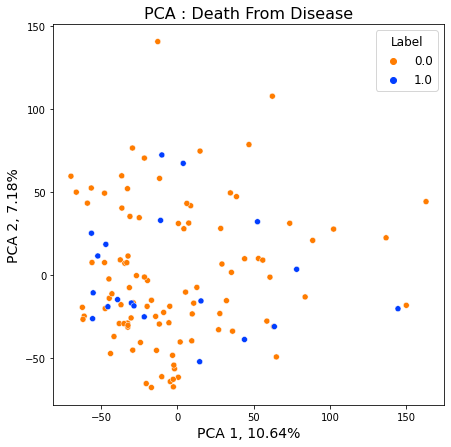

In [94]:
### Merge the data back again for plotting. 

from sklearn.decomposition import PCA

colorPalette = 'bright'
colors = dict(zip( y.unique() ,sns.color_palette(colorPalette)))
ticks_ = 10
legend_ = 12
axis_ = 14 
title_ = 16 
width = 30
height = 10

def pca_plot( df = None, target = None, tag = None ):
    pca = PCA(n_components=2)
    pca.fit(df)
    pca_variance = pca.explained_variance_ratio_.tolist()
    pca_variance[0] = pca_variance[0]*100
    pca_variance[1] = pca_variance[1]*100
    pca1lab = "PCA 1" + ", " + str(round(pca_variance[0], 2)) + "%"
    pca2lab = "PCA 2" + ", " + str(round(pca_variance[1], 2)) + "%"
    df_pca = pd.DataFrame(pca.transform(df), index=df.index, columns=['pca_1','pca_2'])
    plt.figure(figsize = (7, 7))
    ax = sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], data=df,hue=target, palette=colors, edgecolor = 'white')
    plt.xlabel(pca1lab, fontsize = axis_)
    plt.ylabel(pca2lab, fontsize = axis_)
    plt.title("PCA : " + tag , fontsize = title_)
    plt.legend(title='Label', loc='upper right', fontsize = legend_, title_fontsize = legend_)
    plt.xticks(fontsize = ticks_)
    plt.yticks(fontsize = ticks_)
    plt.show(block = False)
    return df_pca


df_pca = pca_plot( df = X_train_temp_norm, target = y_train_temp, tag = "Death From Disease" )

##### K-means clustering 

In [ ]:
kmeans_all = KMeans(n_clusters=k, init='random').fit(X_train_temp_norm)
kmeans_all

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

X_kmeans = X_train_temp_norm.iloc[:, :2]

kmeans_distortion_score = {}
kmeans_silhouette_score = {}

for k in range(2,4):
    kmeans = KMeans(n_clusters=k, init='random').fit(X_kmeans.iloc[:,:2])
    kmeans_centroids_plt = pd.DataFrame(kmeans.cluster_centers_, columns = X_kmeans.columns.values.tolist()[:2])
    X_kmeans['cluster_k{}'.format(k)] = kmeans.labels_
    kmeans_distortion_score[k] = kmeans.inertia_
    colorPalette = 'bright'
    colors = dict(zip(X_kmeans['cluster_k{}'.format(k)].unique(),sns.color_palette(colorPalette)))
    plt.figure(figsize = (5, 5))
    ax = sns.scatterplot(x=X_kmeans.iloc[:,0], y=X_kmeans.iloc[:,1], hue='cluster_k{}'.format(k), palette=colors, data=X_kmeans, style = y, edgecolor='white')
    ax = sns.scatterplot(x=kmeans_centroids_plt.iloc[:,0], y=kmeans_centroids_plt.iloc[:,1], data=kmeans_centroids_plt, linewidth=2.0, marker='+', s=100)
    plt.title("KMeans Clustering of the Top 2 Varying Features", fontsize = 10)
    plt.legend(title='Label', loc='upper right', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

df_scores = pd.DataFrame()
df_scores['Distortion Score'] = pd.Series(kmeans_distortion_score)
df_scores.index.name='k'

fig = plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='k', y='Distortion Score', data=df_scores)

df_scores

#### Combined PCA and K Means


In [121]:
merged_df

,ID,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,Unnamed: 23145,ZXDB,ZXDC,ZYG11A,ZYG11B,Unnamed: 23150,ZZEF1,ZZZ3
0,NB001,M,987.0,ST4,4,HR,1,0.834381,1.910053,1.453191,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
1,NB002,M,1808.0,ST4,4,HR,1,0.743094,NaN,0.640614,...,NaN,5.037365,1.487028,2.748315,3.201112,0.051655,3.595790,5.144157,2.843600,3.052771
2,NB007,M,942.0,ST4,4,HR,0,1.811352,1.617745,1.304178,...,3.475448,4.009473,NaN,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
3,NB012,M,380.0,ST1,1,LR,0,0.867069,1.701012,NaN,...,2.901427,3.363754,NaN,2.135374,3.221429,0.000000,3.320590,4.820981,3.274564,3.420236
4,NB013,M,3394.0,ST4,4,HR,1,1.854000,1.591306,NaN,...,1.889871,2.857943,1.509924,2.074457,3.478700,0.020564,3.193922,4.184836,2.360822,3.498098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NB494,M,56.0,ST1,1,LR,0,0.491331,1.451425,NaN,...,3.540251,3.912382,1.056681,NaN,3.054253,0.011083,3.274257,5.591545,2.942612,3.217237
229,NB495,M,163.0,ST1,1,LR,0,0.868249,1.493852,1.208723,...,3.183471,3.754813,1.118021,1.835253,3.257655,0.000000,3.380637,5.207842,3.231953,3.206993
230,NB496,M,132.0,ST1,1,LR,0,NaN,1.641241,NaN,...,3.287845,4.499380,0.951203,NaN,3.139298,0.070668,3.420162,5.346003,3.213022,2.972568
231,NB497,F,379.0,ST1,1,LR,0,0.660139,1.994978,1.529221,...,2.866374,3.412777,1.539571,2.346282,NaN,0.022501,3.462327,5.427338,NaN,NaN


In [124]:
## Extract the relevant clinical information from the Merged DataFrame

df_common_patient_info_train = merged_df.iloc[ y_train.index, 0:7 ]
df_common_patient_info_test = merged_df.iloc[ y_test.index, 0:7 ]
df_common_patient_info_train

,ID,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease
124,NB252,F,658.0,ST4,4,HR,1
96,NB205,M,165.0,ST1,1,LR,0
5,NB015,M,4785.0,ST4,4,HR,0
56,NB102,M,544.0,ST1,1,LR,0
117,NB245,M,1319.0,ST4,4,HR,1
...,...,...,...,...,...,...,...
106,NB216,M,262.0,ST1,1,LR,0
14,NB027,F,440.0,ST1,1,LR,0
92,NB201,M,98.0,ST1,1,LR,0
179,NB400,M,1812.0,ST4,4,HR,0


In [125]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_norm)

# Get cluster assignments for each data point
labels = kmeans.labels_

df_common_patient_info_train["KMeans_Label"] = labels

pd.DataFrame(pd.crosstab( df_common_patient_info_train["DeathFromDisease"], df_common_patient_info_train["KMeans_Label"] ))


KMeans_Label,0,1
DeathFromDisease,,
0,108,21
1,13,21


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_temp_2D = pca.fit_transform(X_train_temp_norm)

#Plot the data

#ax = sns.scatterplot(x=X_train_temp_2D[:, 0], y=X_train_temp_2D[:, 1], data=X_train_temp_2D)
ax = sns.scatterplot(x=X_train_temp_2D[:, 0], y=X_train_temp_2D[:, 1], hue=labels, data=X_train_temp_2D, style = y_train_temp)

plt.title('KMeans Clustering (reduced to 2D using PCA)')
plt.show()


### Feature Selection [ supervised Feature Selection ]

We will use two feature selection methods.
SelectKBest [ We can select 20 , 30 40 features] 
SelectPercentile [ We can select 1% or 2% or 5% of the top features ]


In [176]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train_norm

In [202]:
## Leave a backup of the data

X_train_norm_bk = X_train_norm
y_train_bk = y_train

X_test_norm_bkup = X_test_norm
y_test_bkup = y_test_temp


In [213]:
# Define target and features
y =  y_train
X = X_train_norm

X

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,Unnamed: 23145,ZXDB,ZXDC,ZYG11A,ZYG11B,Unnamed: 23150,ZZEF1,ZZZ3
0,-0.158555,1.246691,2.105001,-0.194102,-0.334533,-1.613044,-0.491493,-0.323685,-1.790511,-0.370339,...,0.082033,0.725727,1.117269,0.984137,-1.018387,0.387280,-1.925110,0.538626,-0.514642,-0.252413
1,2.487534,1.878544,-1.222934,-0.194102,0.401862,0.326087,-0.491493,-0.055422,0.177163,-1.019548,...,0.872128,0.601022,-2.356550,-2.890246,0.759951,-0.485555,-1.153576,0.687007,0.129285,-2.213675
2,1.748671,-0.375556,0.457356,0.043241,-0.074553,-1.244299,6.832926,-0.609610,-0.902931,0.181741,...,-0.017793,-1.319840,0.063211,1.417366,0.075149,0.013370,0.998637,0.086571,-1.860194,0.127896
3,-0.120777,-0.452208,-0.347986,-0.194102,-0.922194,1.258628,-0.491493,0.662254,0.247441,-0.633944,...,0.005305,-0.651569,-1.207230,-0.232210,-1.095730,-0.536041,-0.530615,1.166769,-0.050307,0.127896
4,-0.990627,0.388993,2.286632,-0.135035,0.499113,0.812994,-0.491493,-0.612766,1.293256,-0.613964,...,0.177425,0.984944,0.377023,0.072444,-0.188066,-0.103180,0.126739,1.090892,-0.416349,-0.741597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-0.715031,-0.616122,-0.448184,-0.194102,-1.299585,-0.623368,0.742221,-0.253521,-0.698502,0.410467,...,-0.988211,0.070447,-0.107612,-0.040900,0.664007,-0.575141,-0.735439,0.086571,2.045875,-0.344413
159,0.319236,-0.522258,0.099055,-0.194102,-0.074553,1.062164,0.132626,0.618412,0.542891,-0.279655,...,-1.205686,-0.839341,0.319546,0.643750,0.145658,-0.426264,0.402473,0.086571,-0.038252,1.032062
160,0.446387,-1.680270,-0.533179,-0.194102,0.028605,1.305646,-0.491493,0.857638,0.750085,0.644233,...,-1.421236,-2.056199,-0.564569,-1.177298,0.075149,-0.575141,0.126739,0.720644,0.129285,0.215425
161,-0.120777,0.938049,0.763204,0.065543,5.028204,0.345739,-0.491493,-0.253521,-0.443684,0.715053,...,0.788697,0.914974,1.996066,0.855436,1.048707,1.334639,0.792373,0.086571,0.444054,0.909728


In [214]:
X = X.reset_index( drop = True )
y = y.reset_index( drop = True )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Specify the number of features
top_n_features = 100

# Set up cross-validation
kf = KFold(n_splits=5)

# Initialize list to hold common features from each fold
common_features = []

## We will use a  RandomForestClassifier to check the performance. 
rf = RandomForestClassifier()

# Iterate over each split
for train_index, test_index in kf.split(X):
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y[train_index], y[test_index]
    
    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=top_n_features)  
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transform the data
    X_new_kbest = selector_kbest.fit_transform(X_train_temp, y_train_temp)
    X_new_percentile = selector_percentile.fit_transform(X_train_temp, y_train_temp)
    
    # Get the selected features
    selected_features_kbest = X.columns[selector_kbest.get_support()]
    selected_features_percentile = X.columns[selector_percentile.get_support()]

    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    print(f"Common features in this fold : {common_features_fold}")

    common_features.append(common_features_fold)
    
    # Train the model on the selected features and compute the accuracy
    X_train_selected = X_train_temp[list(common_features_fold)]
    X_test_selected = X_test_temp[list(common_features_fold)]
    rf.fit(X_train_selected, y_train_temp)
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test_temp, y_pred)
    print(f'Accuracy for this fold: {accuracy}')
    
    # Get the common features and add to the list
    common_features.append(set(selected_features_kbest) & set(selected_features_percentile))

# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")


In [216]:
X_selected = X[list(common_features_fold)]
rf.fit(X_selected, y)
y_pred = rf.predict(X_selected)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy on All Train Data: {accuracy}')


Accuracy on All Train Data: 1.0


In [217]:
# Visualize feature importance

# Use the selector fitted on the whole dataset for visualization
selector_kbest.fit(X, y)
selector_percentile.fit(X, y)

# Get feature importances
importances_kbest = selector_kbest.scores_
importances_percentile = selector_percentile.scores_

# Convert to DataFrame for easier plotting
df_importances_kbest = pd.DataFrame({'Feature': X.columns, 'Importance': importances_kbest})
df_importances_percentile = pd.DataFrame({'Feature': X.columns, 'Importance': importances_percentile})

# Sort by importance
df_importances_kbest = df_importances_kbest.sort_values(by='Importance', ascending=False)
df_importances_percentile = df_importances_percentile.sort_values(by='Importance', ascending=False)

df_importances_kbest


/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  229   230   424  1614  1616  2292  3771  4240  4529  4570  4903  6448
  6474  7302  7554  8201  8631  9369  9560  9841 10888 11737 11753 11759
 11869 11919 12496 13303 13394 13400 13471 13473 13526 13528 14914 14937
 15649 17461 17683 17700 17997 18130 19583 20231] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  229   230   424  1614  1616  2292  3771  4240  4529  4570  4903  6448
  6474  7302  7554  8201  8631  9369  9560  9841 10888 11737 117

,Feature,Importance
11247,MAGEA9,61.616031
2000,C17orf107,58.879446
14109,PGM2L1,56.976429
3093,CCDC86,53.364596
2172,C1orf201,50.930261
...,...,...
17700,SPATA3,NaN
17997,STATH,NaN
18130,SUN5,NaN
19583,TTTY9B,NaN


In [211]:
df_importances_percentile

,Feature,Importance
11247,MAGEA9,61.616031
2000,C17orf107,58.879446
14109,PGM2L1,56.976429
3093,CCDC86,53.364596
2172,C1orf201,50.930261
...,...,...
17700,SPATA3,NaN
17997,STATH,NaN
18130,SUN5,NaN
19583,TTTY9B,NaN


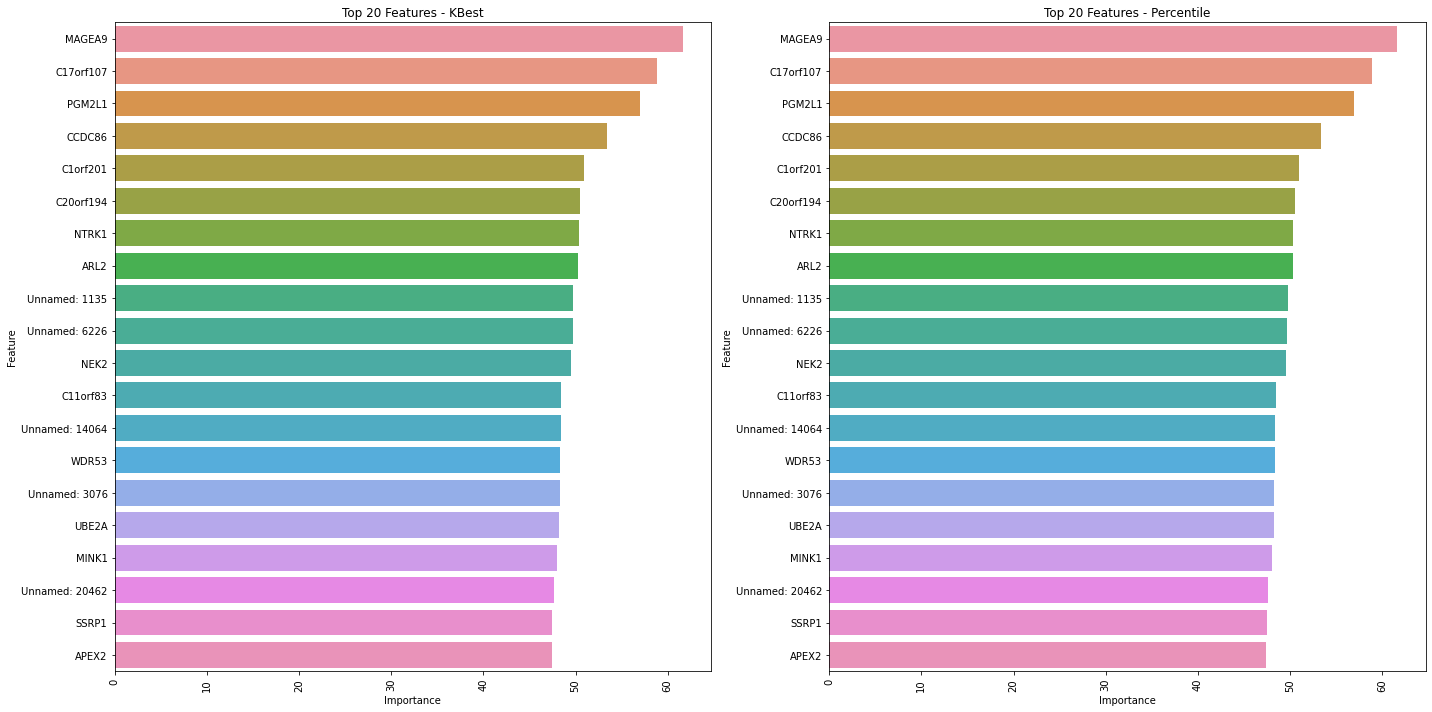

In [218]:

# Plot
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(data=df_importances_kbest[:20], x='Importance', y='Feature')
plt.title('Top 20 Features - KBest')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(data=df_importances_percentile[:20], x='Importance', y='Feature')
plt.title('Top 20 Features - Percentile')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame
df = pd.read_csv('YourDataFrame.csv')

# Create a compound column for stratification
df['compound'] = df['age_grp'].astype(str) + '_' + df['gender'].astype(str) + '_' + df['target'].astype(str)

# Define target and features
y = df['target']  # Replace 'target' with your target column
X = df.drop(['target', 'compound'], axis=1)  # Assuming all other columns are features

# Set up cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize list to hold common features from each fold
common_features = []

# Define hyperparameters to test
svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Initialize models
svm = SVC()
rf = RandomForestClassifier()

# Iterate over each split
for train_index, test_index in skf.split(X, df['compound']): # Now we're splitting based on X and the compound column
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=210)  # Adjust 'k' as per your requirements
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transform the data
    X_new_kbest = selector_kbest.fit_transform(X_train, y_train)
    X_new_percentile = selector_percentile.fit_transform(X_train, y_train)
    
    # Get the selected features
    selected_features_kbest = X.columns[selector_kbest.get_support()]
    selected_features_percentile = X.columns[selector_percentile.get_support()]
    
    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    common_features.append(common_features_fold)

# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")

# Perform hyperparameter tuning on selected features
X_selected = X[list(final_common_features)]

svm_grid_selected = GridSearchCV(svm, svm_params, cv=3)
svm_grid_selected.fit(X_selected, y)

rf_grid_selected = GridSearchCV(rf, rf_params, cv=3)
rf_grid_selected.fit(X_selected, y)

print("Best SVM parameters on selected features: ", svm_grid_selected.best_params_)
print("Best RF parameters on selected features: ", rf_grid_selected.best_params_)

# Perform hyperparameter tuning on all features
svm_grid_all = GridSearchCV(svm, svm_params, cv=3)
svm_grid_all.fit(X, y)

rf_grid_all = GridSearchCV(rf, rf_params, cv=3)
rf_grid_all.fit(X, y)

print("Best SVM parameters on all features: ", svm_grid_all.best_params_)
print("Best RF parameters on all features: ", rf_grid_all.best_params_)


### Hyper Parameter Tuning  ###

1.Identify the best hyper parameters for the classifer.
2. Stratify based on multiple covariates
3. Train a model with the best hyper parameter with selected features and withour seleted features. 


In [1]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Reload the Train and Test Data

X_train_norm = pd.read_csv("X_Train_norm.csv", sep =",",index_col=0)
X_test_norm = pd.read_csv("X_Test_norm.csv", sep =",",index_col=0)

y_train = pd.read_csv("y_train.csv", sep =",",index_col=0)
y_test = pd.read_csv("y_test.csv", sep =",",index_col=0)

Clinical_Info = pd.read_csv("Clinical_Info.csv", sep =",",index_col=0)


In [3]:
## subset the Clinical Data

Clinical_Info_train = Clinical_Info[  Clinical_Info["ID"].isin( y_train.index.to_list() ) ]
Clinical_Info_train.to_csv("Clinical_Info_train", sep = ",")
Clinical_Info_test = Clinical_Info[  Clinical_Info["ID"].isin( y_test.index.to_list() ) ]
Clinical_Info_test.to_csv("Clinical_Info_test", sep = ",")

In [4]:
Clinical_Info_test

,Gender,Age,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID
NB022,M,401.0,ST1,1,LR,0,NB022
NB023,M,420.0,ST1,1,LR,0,NB023
NB028,F,468.0,ST1,1,LR,0,NB028
NB029,M,463.0,ST1,1,LR,0,NB029
NB031,F,494.0,ST1,1,LR,0,NB031
...,...,...,...,...,...,...,...
NB482,M,465.0,ST4,4,LR,0,NB482
NB483,F,259.0,ST1,1,LR,0,NB483
NB491,M,2326.0,ST4,4,HR,0,NB491
NB496,M,132.0,ST1,1,LR,0,NB496


In [4]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to 'col_to_impute'
column_transformer = ColumnTransformer(
    transformers=[
        ('imputer', imputer, ['Age'])
    ], remainder='passthrough')  # 'passthrough' means that all other columns will be left as they are

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])

# Apply the pipeline to the DataFrame
Clinical_Info_train_imputed = pd.DataFrame(pipeline.fit_transform(Clinical_Info_train))

Clinical_Info_train_imputed.columns = ['Age', 'Gender', 'clinico genetic subgroup', 'INSS Stage', 'HighRisk', 'DeathFromDisease', 'ID']
Clinical_Info_train_imputed

,Age,Gender,clinico genetic subgroup,INSS Stage,HighRisk,DeathFromDisease,ID
0,987.0,M,ST4,4,HR,1,NB001
1,1808.0,M,ST4,4,HR,1,NB002
2,942.0,M,ST4,4,HR,0,NB007
3,380.0,M,ST1,1,LR,0,NB012
4,3394.0,M,ST4,4,HR,1,NB013
...,...,...,...,...,...,...,...
158,212.0,F,ST4,4,LR,0,NB488
159,190.0,M,ST1,1,LR,0,NB493
160,56.0,M,ST1,1,LR,0,NB494
161,163.0,M,ST1,1,LR,0,NB495


In [5]:
# Create a compound column for stratification


#y_train_compound = Clinical_Info_train_imputed['DeathFromDisease'].astype(str) + '_' + Clinical_Info_train_imputed['Gender'].astype(str) + '_' + Clinical_Info_train_imputed['Age_Category'].astype(str)

y_train_compound = Clinical_Info_train['DeathFromDisease'].astype(str) + '_' + Clinical_Info_train['Gender'].astype(str)
y_train_compound
y_train_compound.unique()
y_train = Clinical_Info_train['DeathFromDisease']
y_train

NB001    1
NB002    1
NB007    0
NB012    0
NB013    1
        ..
NB488    0
NB493    0
NB494    0
NB495    0
NB498    0
Name: DeathFromDisease, Length: 163, dtype: int64

In [7]:
# Set up cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize list to hold common features from each fold
common_features = []

# Define hyperparameters to test
#svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Initialize models
rf = RandomForestClassifier()

In [8]:
type(y_train_compound)

X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.columns



Index(['1/2-SBSRNA4', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2LD1', 'A2M', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZUFSP', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=19335)

In [9]:
#X = X_train_norm.drop(['y_train_compound'], axis = 1 )
# X_train_norm["y_train_compound"]
y_train = Clinical_Info_train["DeathFromDisease"]
y_train = y_train.reset_index(drop=True)
y_train_compound = y_train_compound.reset_index(drop=True)
y_train_compound
X_train_norm
#y_train


,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZZEF1,ZZZ3
0,-0.158555,1.246691,2.105001,-0.194102,-0.334533,-1.613044,-0.491493,-0.323685,-1.790511,-0.370339,...,-0.149737,0.565752,0.082033,0.725727,0.984137,-1.018387,0.387280,-1.925110,-0.514642,-0.252413
1,2.487534,1.878544,-1.222934,-0.194102,0.401862,0.326087,-0.491493,-0.055422,0.177163,-1.019548,...,0.861454,1.035915,0.872128,0.601022,-2.890246,0.759951,-0.485555,-1.153576,0.129285,-2.213675
2,1.748671,-0.375556,0.457356,0.043241,-0.074553,-1.244299,6.832926,-0.609610,-0.902931,0.181741,...,2.512334,0.700690,-0.017793,-1.319840,1.417366,0.075149,0.013370,0.998637,-1.860194,0.127896
3,-0.120777,-0.452208,-0.347986,-0.194102,-0.922194,1.258628,-0.491493,0.662254,0.247441,-0.633944,...,-0.745220,0.389377,0.005305,-0.651569,-0.232210,-1.095730,-0.536041,-0.530615,-0.050307,0.127896
4,-0.990627,0.388993,2.286632,-0.135035,0.499113,0.812994,-0.491493,-0.612766,1.293256,-0.613964,...,-1.246387,-0.587487,0.177425,0.984944,0.072444,-0.188066,-0.103180,0.126739,-0.416349,-0.741597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-0.715031,-0.616122,-0.448184,-0.194102,-1.299585,-0.623368,0.742221,-0.253521,-0.698502,0.410467,...,0.146965,-0.024065,-0.988211,0.070447,-0.040900,0.664007,-0.575141,-0.735439,2.045875,-0.344413
159,0.319236,-0.522258,0.099055,-0.194102,-0.074553,1.062164,0.132626,0.618412,0.542891,-0.279655,...,-0.183276,-0.453491,-1.205686,-0.839341,0.643750,0.145658,-0.426264,0.402473,-0.038252,1.032062
160,0.446387,-1.680270,-0.533179,-0.194102,0.028605,1.305646,-0.491493,0.857638,0.750085,0.644233,...,-0.067637,-0.709974,-1.421236,-2.056199,-1.177298,0.075149,-0.575141,0.126739,0.129285,0.215425
161,-0.120777,0.938049,0.763204,0.065543,5.028204,0.345739,-0.491493,-0.253521,-0.443684,0.715053,...,0.252466,-1.360936,0.788697,0.914974,0.855436,1.048707,1.334639,0.792373,0.444054,0.909728


In [10]:
y_train_compound.index = y_train.index

In [23]:
y_train_compound

0      1_M
1      1_M
2      0_M
3      0_M
4      1_M
      ... 
158    0_F
159    0_M
160    0_M
161    0_M
162    0_F
Length: 163, dtype: object

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5)

rf = RandomForestClassifier()

## Number of top features
top_k = 300

# Iterate over each split
for train_index, test_index in skf.split(X_train_norm, y_train_compound):
    X_train_temp, X_test_temp = X_train_norm.iloc[train_index], X_train_norm.iloc[test_index]
    y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]

    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=top_k)  # Adjust 'k' as per your requirements
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transforX_train, y_trainm the data
    X_new_kbest = selector_kbest.fit_transform(X_train_temp, y_train_temp)
    X_new_percentile = selector_percentile.fit_transform(X_train_temp, y_train_temp)
    
    # Get the selected features
    selected_features_kbest = X_train_temp.columns[selector_kbest.get_support()]
    selected_features_percentile = X_train_temp.columns[selector_percentile.get_support()]
    
    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    common_features.append(common_features_fold)
    #print("Common Features in thi Fold : ", common_features_fold )

    # Train the model on the selected features and compute the accuracy
    X_train_selected = X_train_temp[list(common_features_fold)]
    X_test_selected = X_test_temp[list(common_features_fold)]
    rf.fit(X_train_selected, y_train_temp)
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test_temp, y_pred)
    print(f'Accuracy for this fold: {accuracy}')


# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")


/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  208   209   382  1460  1462  2085  3448  3791  3877  4138  4172  4463
  5863  5888  6522  6641  7178  7453  7849  8518  8528  8700  8959  9915
 10682 10698 10704 10806 10854 11462 12092 12095 12102 12124 12214 12228
 12242 12288 12290 12292 12296 12350 12351 12353 13349 13620 13640 14275
 14959 15814 15900 15924 15989 16135 16151 16236 16240 16419 16540 17581
 17860 17923 18460 18695] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encoun

Accuracy for this fold: 0.7575757575757576


/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  208   209   382  1460  1462  2085  3448  3791  3877  4138  4172  4463
  5863  5888  6522  6641  7178  7453  7849  8518  8528  8700  8959  9915
 10682 10698 10704 10806 10854 11462 12092 12095 12102 12124 12214 12228
 12242 12288 12290 12292 12296 12350 12351 12353 13349 13620 13640 14275
 14959 15814 15900 15924 15989 16135 16151 16236 16240 16419 16540 17581
 17860 17923 18460 18695] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encoun

Accuracy for this fold: 0.8181818181818182


/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  208   209   382  1460  1462  2085  3448  3791  3877  4138  4172  4463
  5863  5888  6522  6641  7178  7453  7849  8518  8528  8700  8959  9915
 10682 10698 10704 10806 10854 11462 12092 12095 12102 12124 12214 12228
 12242 12288 12290 12292 12296 12350 12351 12353 13349 13620 13640 14275
 14959 15814 15900 15924 15989 16135 16151 16236 16240 16419 16540 17581
 17860 17923 18460 18695] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encoun

Accuracy for this fold: 0.7272727272727273


/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  208   209   382  1460  1462  2085  3448  3791  3877  4138  4172  4463
  5863  5888  6522  6641  7178  7453  7849  8518  8528  8700  8959  9915
 10682 10698 10704 10806 10854 11462 12092 12095 12102 12124 12214 12228
 12242 12288 12290 12292 12296 12350 12351 12353 13349 13620 13640 14275
 14959 15814 15900 15924 15989 16135 16151 16236 16240 16419 16540 17581
 17860 17923 18460 18695] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encoun

Accuracy for this fold: 0.75


/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  208   209   382  1460  1462  2085  3448  3791  3877  4138  4172  4463
  5863  5888  6522  6641  7178  7453  7849  8518  8528  8700  8959  9915
 10682 10698 10704 10806 10854 11462 12092 12095 12102 12124 12214 12228
 12242 12288 12290 12292 12296 12350 12351 12353 13349 13620 13640 14275
 14959 15814 15900 15924 15989 16135 16151 16236 16240 16419 16540 17581
 17860 17923 18460 18695] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/mamun/software/miniconda3/envs/medai/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encoun

Accuracy for this fold: 0.71875
Final common features: {'KLRAP1', 'UPF2', 'WASF3', 'C1orf27', 'ANKUB1', 'ARHGAP12', 'THAP2', 'C16orf52', 'ZNF569'}


In [16]:
len(y_test.to_numpy())


#X_test_norm.shape
final_common_features_df = pd.DataFrame({ 'final_feats': list(final_common_features)})
final_common_features_df.to_csv("final_features.csv")

X_train_norm[ final_common_features ]

,KLRAP1,UPF2,WASF3,C1orf27,ANKUB1,ARHGAP12,THAP2,C16orf52,ZNF569
0,0.187046,-1.437647,-2.037256,0.412502,-0.315274,-1.638436,-0.415902,0.063962,0.002601
1,-2.042203,-1.444695,-2.080187,-2.254851,-0.315274,-1.042268,-1.464200,-2.195938,-1.905480
2,0.460666,2.162002,1.726143,0.126539,-0.315274,1.746978,1.140040,1.689405,2.445645
3,0.243741,-1.088056,1.124509,0.495209,1.943044,0.152290,-0.397299,0.257047,-0.831379
4,0.023948,0.180300,-0.907980,1.744900,2.058794,-0.998239,-0.900477,0.283655,0.040169
...,...,...,...,...,...,...,...,...,...
158,1.126027,0.535706,0.133799,0.247629,-0.315274,-0.339657,-0.499791,-0.001107,-0.154757
159,0.809266,-0.594015,0.024102,-0.348191,-0.315274,0.325785,1.203729,0.584013,0.900657
160,0.436456,-0.140569,-0.880101,-1.115451,1.698030,0.667544,0.422572,-0.386528,-1.219265
161,0.881185,-0.936471,-1.688863,1.725404,-0.315274,-0.870154,-0.065238,-0.194404,-0.146266


In [17]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## ============= ##
## Do not uncomment this. 
X_train_norm = pd.read_csv("X_Train_norm.csv", sep =",",index_col=0)
X_test_norm = pd.read_csv("X_Test_norm.csv", sep =",",index_col=0)
y_train = pd.read_csv("y_train.csv", sep =",",index_col=0)
y_test = pd.read_csv("y_test.csv", sep =",",index_col=0)

print(X_train_norm.shape)
print(y_train.shape)
print(X_test_norm.shape)
print(y_test.shape)


(163, 19335)
(163, 1)
(70, 19335)
(70, 1)


In [ ]:
# Define hyperparameters to test
#svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

## ============= ##

# Perform hyperparameter tuning on selected features
X_train_selected_df = X_train_norm[list(final_common_features)]
X_test_selected_df = X_test_norm[list(final_common_features)]


# Perform hyperparameter tuning and model training on selected features
rf_grid_selected = GridSearchCV(rf, rf_params, cv=3)
rf_grid_selected.fit(X_train_selected_df, y_train)
print("Best RF parameters on selected features: ", rf_grid_selected.best_params_)

y_test_pred = rf_grid_selected.predict(X_test_selected_df)
accuracy_on_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy of the best model : {accuracy_on_test}')



In [ ]:
# Perform hyperparameter tuning and model training on all features
rf_grid_all = GridSearchCV(rf, rf_params, cv=3)
rf_grid_all.fit(X_train_norm, y_train)
print("Best RF parameters on all features: ", rf_grid_all.best_params_)

y_test_all_pred = rf_grid_all.predict(X_test_norm)
accuracy_all_on_test = accuracy_score(y_test, y_test_all_pred)
print(f'Accuracy of the best model using all features : {accuracy_all_on_test}')


### Model Performance Evaluation

- In this section we will evaluate the two trained models (all features and selected features)
- Compared several performance metrics.
- Choose the best model to take forward. 





In [25]:
## Helper Function : plot the ROC and Precision-Recall curves and print the confusion matrix:

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, roc_auc_score,f1_score
import matplotlib.pyplot as plt


def plot_curves_and_cm(y_test, y_pred, y_prob):
    # Print Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6,6))
    plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()


# Performance metrics
def print_metrics(y_test, pred, prob):
    print('Accuracy:', accuracy_score(y_test, pred))
    print('F1 Score:', f1_score(y_test, pred))
    print('ROC AUC:', roc_auc_score(y_test, prob))
    precision, recall, _ = precision_recall_curve(y_test, prob)
    print('PR AUC:', auc(recall, precision))

## Plots a barplot of feature importance for the top N ( no_od_features ) features  
def feat_importance( clf = None, X_train = None, no_of_feats = 5 ):
    # Calculate feature importances
    feature_importance = clf.feature_importances_

    # Normalize the individual importances
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # Get the indices of the top 5 features
    sorted_idx = np.argsort(feature_importance)[-no_of_feats:]

    pos = np.arange(sorted_idx.shape[0]) + .5

    # Plot the importance scores for the top 5 features
    plt.figure(figsize=(10, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Top 5 Variable Importance')
    plt.show()


Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest With Selected Features:
Accuracy: 0.8571428571428571
F1 Score: 0.16666666666666666
ROC AUC: 0.8387096774193549
PR AUC: 0.32130456328825896
Confusion Matrix:
[[59  3]
 [ 7  1]]


/tmp/ipykernel_5234/774968125.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_selected_best.fit(X_train_selected_df, y_train)


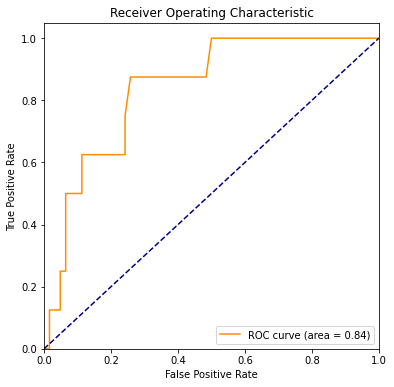

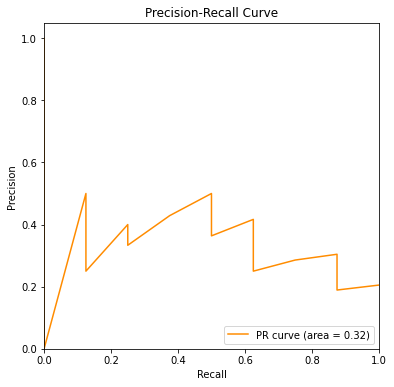

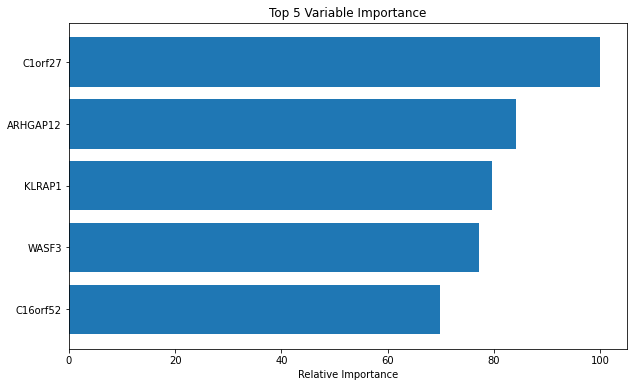

In [26]:
## model With selected Features ##

import numpy as np

best_params_selected_feat = rf_grid_selected.best_params_
print("Best parameters: ", best_params_selected_feat)

# Train a new classifier using the best parameters
rf_selected_best = RandomForestClassifier(**best_params_selected_feat)
rf_selected_best.fit(X_train_selected_df, y_train)


### Selected Feature Model
y_test_rf_pred = rf_selected_best.predict(X_test_selected_df)
y_test_rf_prob = rf_selected_best.predict_proba(X_test_selected_df)

print("\nRandom Forest With Selected Features:")
print_metrics( y_test , y_test_rf_pred, y_test_rf_prob[:,1] )

# Plot ROC and PR curves and print Confusion Matrix
plot_curves_and_cm(y_test , y_test_rf_pred, y_test_rf_prob[:,1] )

feat_importance( clf = rf_selected_best, X_train=X_train_selected_df, no_of_feats = 5 )



Best parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


/tmp/ipykernel_5234/1001670515.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_all_best.fit(X_train_norm, y_train)



Random Forest With All Features:
Accuracy: 0.8857142857142857
F1 Score: 0.3333333333333333
ROC AUC: 0.9254032258064516
PR AUC: 0.4383545274170274
Confusion Matrix:
[[60  2]
 [ 6  2]]


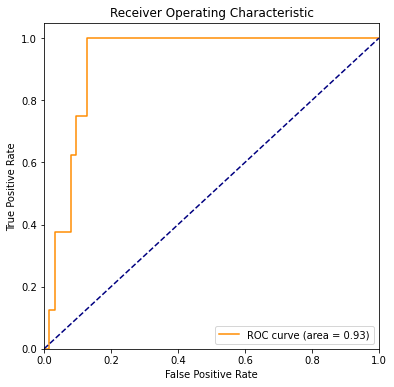

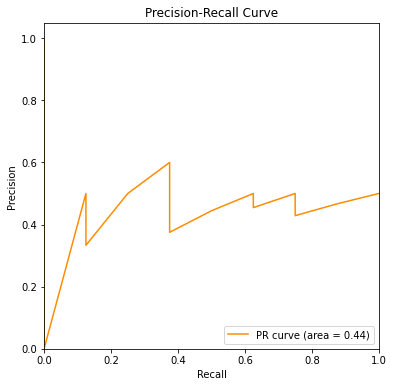

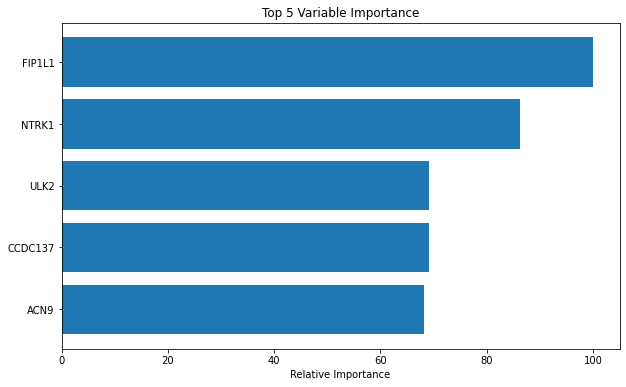

In [29]:
### Model with All features

best_params_all_feat = rf_grid_all.best_params_
print("Best parameters: ", best_params_all_feat)

# Train a new classifier using the best parameters
rf_all_best = RandomForestClassifier(**best_params_all_feat)
rf_all_best.fit(X_train_norm, y_train)


### Selected Feature Model
y_test_all_rf_pred = rf_all_best.predict(X_test_norm)
y_test_all_rf_prob = rf_all_best.predict_proba(X_test_norm)

print("\nRandom Forest With All Features:")
print_metrics( y_test , y_test_all_rf_pred, y_test_all_rf_prob[:,1] )

# Plot ROC and PR curves and print Confusion Matrix
plot_curves_and_cm(y_test , y_test_all_rf_pred, y_test_all_rf_prob[:,1] )


feat_importance( clf = rf_all_best, X_train= X_train_norm, no_of_feats = 5 )


